In [138]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import torch 
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split


## AI Model
- This is an **Regression** model and is designed to predict countinuouse values like eg 0 - 100 %
- This model is designed to preict the likellyhood from 0 - 100 % of an earthquake happening
-1–20%	Very Unlikely	Minimal chance of occurrence	More than a month (if ever)
-21–40%	Unlikely	Low but notable chance	Weeks to a month
-41–60%	Moderate Likelihood	Could occur, needs monitoring	Days to weeks
-61–80%	Likely	High chance, prepare actions	Hours to days
-81–100%	Critical/Imminent	Almost certain	Minutes to hours

---


### Data Preprocessing 
- we divide the data into target and the features
- then we scale it so that no values take more importance than the other preventing this if they are all in the same range
- then we split into training and testing parts
- sicne we are ussing a torch model not a numpy one we have to convert each to a torch tensor of dtype float 32
- then we reduce the x varieble from 3d to 2d

---

In [ ]:
file = pd.read_csv("Earthquake_dataset.csv")
x = file.drop(["Target"],axis=1).values
y = file["Target"].values
# split the data into target(y) and features(x)

In [ ]:
# define our scaler function for scalling from preprocessing
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [116]:
xt = x_scaler.fit_transform(x)
yt = y_scaler.fit_transform(y.reshape(-1,1))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(xt,yt,test_size = 0.3,random_state=42)
# spliting the dat so we can evluate later on with unseen data

In [ ]:
# converting to torch tensor
x_train = torch.tensor(x_train,dtype = torch.float32)
x_test = torch.tensor(x_test,dtype = torch.float32)
y_train = torch.tensor(y_train,dtype = torch.float32)
y_test = torch.tensor(y_test,dtype = torch.float32)
# converting to 3d - 2d
x_train = x_train.unsqueeze(-1)
x_test = x_test.unsqueeze(-1)

### Architecture chossen 
- we chose the LSTM architecture because it is best suited fro this task with its hidden states it would be greate at capturring the data from a large datat set and the connections between each features
- Also it is better suited than ussing RNN as Rnn would be as it is better in capturring the data 
- we didnt choose GRU as it is too memory hogging comparred to LSTM ,as LSTM is more complex than RNN but simple enough to be better than GRU
- i found that while training 5 layers was the max as more than that we wouldnt see improvement in training and more overfitting and i 55 hidden state units was the max as adding more would improve the loss but training time would take forever

In [143]:
input_size = 1
hidden_size = 55
output_size = 1
num_layers = 5
model = nn.LSTM(input_size,hidden_size,num_layers,batch_first=True)
output_layer = nn.Linear(hidden_size,output_size)
optimizer = optim.Adam(list(model.parameters()) + list(output_layer.parameters()),lr=0.0001)
loss2 = np.zeros(200)
loss_fn = nn.MSELoss()


In [144]:
for i in range(200):
    model.train()
    optimizer.zero_grad()
    output , hidden = model(x_train)
    preds = output_layer(output[:,-1,:])
    loss = loss_fn(preds,y_train)
    loss.backward()
    loss2[i] = loss.item()
    optimizer.step()
    print(f"MSE = {loss2[i]}")


MSE = 0.4509870111942291
MSE = 0.44751086831092834
MSE = 0.44404348731040955
MSE = 0.4405839741230011
MSE = 0.4371311664581299
MSE = 0.4336843490600586
MSE = 0.4302423596382141
MSE = 0.4268041253089905
MSE = 0.423368364572525
MSE = 0.4199337661266327
MSE = 0.4164988398551941
MSE = 0.4130619466304779
MSE = 0.4096212685108185
MSE = 0.4061748683452606
MSE = 0.40272077918052673
MSE = 0.39925694465637207
MSE = 0.39578160643577576
MSE = 0.3922925591468811
MSE = 0.38878801465034485
MSE = 0.38526594638824463
MSE = 0.3817242980003357
MSE = 0.3781610131263733
MSE = 0.37457406520843506
MSE = 0.3709613084793091
MSE = 0.36732038855552673
MSE = 0.3636492192745209
MSE = 0.35994523763656616
MSE = 0.35620614886283875
MSE = 0.3524293005466461
MSE = 0.34861207008361816
MSE = 0.34475159645080566
MSE = 0.3408450484275818
MSE = 0.3368892967700958
MSE = 0.33288121223449707
MSE = 0.32881730794906616
MSE = 0.32469409704208374
MSE = 0.3205079138278961
MSE = 0.3162546455860138
MSE = 0.3119303584098816
MSE = 0.30

### Modela Training 
- as you can see we Have achieved a good loss of 0.04 which is amazing considerring we have a scale from 1-100 0.04 = 0.2 erro margin as we are  ussing Mean Square Error which mean is is on avarage 
99.98 % accurate which is increadible fro a model like this 
- and you can also see how much the model has improved over the following epochs in the line plot

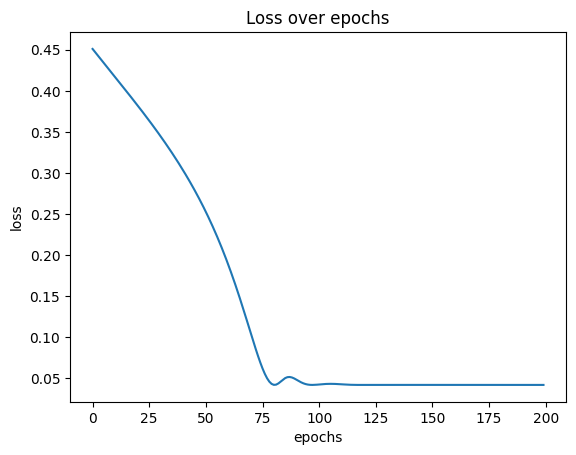

In [145]:
sns.lineplot(loss2)
plt.title("Loss over epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
# put model in evaluation mode 
model.eval()

LSTM(1, 55, num_layers=5, batch_first=True)

In [148]:
for i in range(200):
    optimizer.zero_grad()
    output , hidden = model(x_test)
    preds = output_layer(output[:,-1,:])
    loss = loss_fn(preds,y_test)
    loss.backward()
    loss2[i] = loss.item()
    optimizer.step()
    print(f"MSE = {loss2[i]}")

MSE = 0.04136582091450691
MSE = 0.04136461392045021
MSE = 0.041362155228853226
MSE = 0.04135889187455177
MSE = 0.04135530814528465
MSE = 0.04135186970233917
MSE = 0.04134893789887428
MSE = 0.04134673997759819
MSE = 0.041345398873090744
MSE = 0.04134485870599747
MSE = 0.04134497791528702
MSE = 0.04134555906057358
MSE = 0.04134635627269745
MSE = 0.041347164660692215
MSE = 0.04134779050946236
MSE = 0.041348133236169815
MSE = 0.04134814068675041
MSE = 0.04134783148765564
MSE = 0.04134727641940117
MSE = 0.04134654998779297
MSE = 0.04134577885270119
MSE = 0.04134505242109299
MSE = 0.041344426572322845
MSE = 0.041343968361616135
MSE = 0.041343677788972855
MSE = 0.04134354740381241
MSE = 0.04134353995323181
MSE = 0.041343607008457184
MSE = 0.041343700140714645
MSE = 0.04134378582239151
MSE = 0.041343819350004196
MSE = 0.041343796998262405
MSE = 0.041343700140714645
MSE = 0.04134354367852211
MSE = 0.04134334623813629
MSE = 0.04134312644600868
MSE = 0.04134291037917137
MSE = 0.04134269803762436


### Model Testing
- as we tested it on unseen data the model is performing pretty much similar with onyl a 0.001 difference infactt testing score is sslightly better 
- as you can also see in the line plot loss goes down as the model learns from new unseen data and adapts it self to reduce loss of courece the scale hear is different as it starts with 0.04 itself

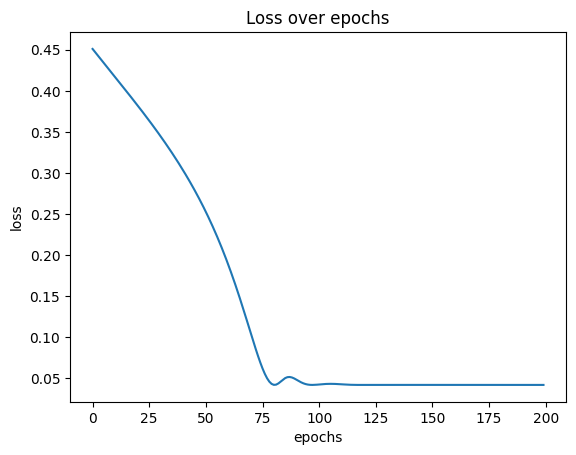

In [147]:
sns.lineplot(loss2)
plt.title("Loss over epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [140]:
torch.save(model,"LSTM_EarthQuake_model_v3.pth")